# Gamma ray sources classification into pulsars and AGNs

In the mid-1960s, researchers first discovered pulsars, which emit regular
bursts of radio waves and were initially considered enigmatic. It was later
found that they were rotating neutron stars emitting radiation that was
observed across a broad range of wavelengths, including gamma rays. Since
then, gamma-ray astronomy has continued to be a field of active research, and
a significant fraction of gamma-ray sources remain unidentified. The goal of
this model is to develop a machine learning model that can
accurately classify gamma-ray sources based on their characteristics and
properties, using data from various space-based observatories. Gamma-ray
sources can be broadly classified into two types: AGNs and pulsars. The pulsars
can be further classified as millisecond pulsars or young pulsars. Similarly some
common types of AGNs include quasars, Seyfert galaxies, and blazars.


In [1]:
#importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

#making sure all the columns are visible
pd.set_option('display.max_columns', None)



---                                       

## 1.Importing and inspecting the gamma ray sources data

In [2]:
#Loading the dataset
GS = pd.read_csv("4FGL_DR3_Dataset_Enigma.csv")

GS.head()

,Unnamed: 0,Name,RA (deg),DEC (deg),Signif_Avg,Pivot_Energy,Flux1000,Energy_Flux100,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,LP_SigCurv,PLEC_Flux_Density,PLEC_IndexS,PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,Npred,Variability_Index,Frac_Variability,CLASS1,CLASS2
0,0,4FGL J0000.3-7355,0.0983,0.0983,7.459561,2329.5903,1.392216e-10,1.581099e-12,2.610434e-14,2.179690,2.904301e-14,2.063685,0.091939,0.749253,2.918480e-14,1.993013,0.150609,0.666667,1.292339,305.21463,14.602470,0.215777,,
1,1,4FGL J0000.5+0743,0.1375,0.1375,5.271726,1304.1947,1.951913e-10,1.121896e-12,1.039931e-13,2.349694,1.575568e-13,2.069591,0.454411,2.549887,1.475405e-13,1.998095,0.586220,0.666667,2.532814,197.24410,25.399525,0.687574,,
2,2,4FGL J0000.7+2530,0.1878,0.1878,4.177483,6318.9400,7.202151e-11,8.571274e-13,2.058057e-15,1.852803,3.043761e-15,1.646164,0.376358,1.471138,3.079466e-15,1.507830,0.720244,0.666667,1.562938,87.70652,13.650518,0.000000,,
3,3,4FGL J0001.2+4741,0.3126,0.3126,4.692600,2420.5752,1.259796e-10,1.499454e-12,2.156031e-14,2.271696,2.196550e-14,2.254081,0.012156,0.083893,2.228697e-14,2.219642,0.029462,0.666667,0.337723,293.14978,25.313953,0.675882,bcu,
4,4,4FGL J0001.2-0747,0.3151,0.3151,23.782486,1721.6039,7.471219e-10,8.339171e-12,2.656894e-13,2.116692,2.842831e-13,2.078927,0.051182,1.697737,2.813444e-13,2.046604,0.063212,0.666667,1.892928,1192.35190,46.780693,0.406565,bll,


In [3]:
GS.rename(columns={'Unnamed: 0':'SNo'},inplace=True)
GS.head()

,SNo,Name,RA (deg),DEC (deg),Signif_Avg,Pivot_Energy,Flux1000,Energy_Flux100,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,LP_SigCurv,PLEC_Flux_Density,PLEC_IndexS,PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,Npred,Variability_Index,Frac_Variability,CLASS1,CLASS2
0,0,4FGL J0000.3-7355,0.0983,0.0983,7.459561,2329.5903,1.392216e-10,1.581099e-12,2.610434e-14,2.179690,2.904301e-14,2.063685,0.091939,0.749253,2.918480e-14,1.993013,0.150609,0.666667,1.292339,305.21463,14.602470,0.215777,,
1,1,4FGL J0000.5+0743,0.1375,0.1375,5.271726,1304.1947,1.951913e-10,1.121896e-12,1.039931e-13,2.349694,1.575568e-13,2.069591,0.454411,2.549887,1.475405e-13,1.998095,0.586220,0.666667,2.532814,197.24410,25.399525,0.687574,,
2,2,4FGL J0000.7+2530,0.1878,0.1878,4.177483,6318.9400,7.202151e-11,8.571274e-13,2.058057e-15,1.852803,3.043761e-15,1.646164,0.376358,1.471138,3.079466e-15,1.507830,0.720244,0.666667,1.562938,87.70652,13.650518,0.000000,,
3,3,4FGL J0001.2+4741,0.3126,0.3126,4.692600,2420.5752,1.259796e-10,1.499454e-12,2.156031e-14,2.271696,2.196550e-14,2.254081,0.012156,0.083893,2.228697e-14,2.219642,0.029462,0.666667,0.337723,293.14978,25.313953,0.675882,bcu,
4,4,4FGL J0001.2-0747,0.3151,0.3151,23.782486,1721.6039,7.471219e-10,8.339171e-12,2.656894e-13,2.116692,2.842831e-13,2.078927,0.051182,1.697737,2.813444e-13,2.046604,0.063212,0.666667,1.892928,1192.35190,46.780693,0.406565,bll,


In [4]:
#let's look at the statistical aspects of the dataframe
GS.describe()

,SNo,RA (deg),DEC (deg),Signif_Avg,Pivot_Energy,Flux1000,Energy_Flux100,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,LP_SigCurv,PLEC_Flux_Density,PLEC_IndexS,PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,Npred,Variability_Index,Frac_Variability
count,6659.000000,6659.000000,6659.000000,6658.000000,6659.000000,6.659000e+03,6.659000e+03,6.658000e+03,6658.000000,6.659000e+03,6659.000000,6659.000000,6659.000000,6.658000e+03,6658.000000,6658.000000,6658.000000,6659.000000,6659.000000,6.659000e+03,6659.000000
mean,3329.000000,190.437892,190.437892,15.639615,2737.386617,1.453465e-09,1.266817e-11,3.625125e-11,2.283192,2.767488e-11,2.215740,0.230219,2.975724,2.785301e-11,2.142938,0.417266,0.665748,2.977417,1352.746395,-inf,-inf
std,1922.432053,99.673564,99.673564,28.926910,4208.618377,1.913959e-08,1.322343e-10,2.853454e-09,0.295798,2.129364e-09,0.385238,0.255427,5.916809,2.146587e-09,0.374804,0.624839,0.019202,5.987263,5375.139223,NaN,NaN
min,0.000000,0.098300,0.098300,1.623841,49.677998,3.740937e-13,3.707689e-13,2.682798e-17,1.014061,3.623631e-17,-0.048980,-0.151934,0.000000,4.000388e-17,-0.159668,-0.368838,0.207654,0.000000,5.918154,-inf,-inf
25%,1664.500000,107.921600,107.921600,5.441673,1098.925400,1.584481e-10,1.846526e-12,2.747724e-14,2.064106,3.177824e-14,1.948876,0.054827,0.984587,3.141187e-14,1.891283,0.056860,0.666667,1.006731,299.277260,9.496667e+00,0.000000
50%,3329.000000,203.322700,203.322700,7.901763,1764.813600,3.025504e-10,3.295702e-12,1.422794e-13,2.313304,1.799026e-13,2.224967,0.138951,2.038423,1.755163e-13,2.164486,0.170415,0.666667,2.033031,549.045170,1.419961e+01,0.182504
75%,4993.500000,272.013650,272.013650,14.593597,3105.348600,6.986070e-10,7.068370e-12,5.537922e-13,2.508057,7.314475e-13,2.492634,0.332463,3.520772,7.245303e-13,2.412008,0.550371,0.666667,3.507771,1009.155375,2.525354e+01,0.471393
max,6658.000000,359.990800,359.990800,884.642940,195054.750000,1.333140e-06,9.292083e-09,2.328326e-07,3.371371,1.737617e-07,3.444003,1.000000,239.436390,1.751540e-07,3.318735,5.448646,1.000000,244.335510,261898.020000,8.434076e+04,2.910003


In [5]:
# replace -np.inf with a specific value, 0
GS.replace(-np.inf, 0, inplace=True)
GS.describe()

,SNo,RA (deg),DEC (deg),Signif_Avg,Pivot_Energy,Flux1000,Energy_Flux100,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,LP_SigCurv,PLEC_Flux_Density,PLEC_IndexS,PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,Npred,Variability_Index,Frac_Variability
count,6659.000000,6659.000000,6659.000000,6658.000000,6659.000000,6.659000e+03,6.659000e+03,6.658000e+03,6658.000000,6.659000e+03,6659.000000,6659.000000,6659.000000,6.658000e+03,6658.000000,6658.000000,6658.000000,6659.000000,6659.000000,6659.000000,6659.000000
mean,3329.000000,190.437892,190.437892,15.639615,2737.386617,1.453465e-09,1.266817e-11,3.625125e-11,2.283192,2.767488e-11,2.215740,0.230219,2.975724,2.785301e-11,2.142938,0.417266,0.665748,2.977417,1352.746395,141.873469,0.285620
std,1922.432053,99.673564,99.673564,28.926910,4208.618377,1.913959e-08,1.322343e-10,2.853454e-09,0.295798,2.129364e-09,0.385238,0.255427,5.916809,2.146587e-09,0.374804,0.624839,0.019202,5.987263,5375.139223,1688.776708,0.350881
min,0.000000,0.098300,0.098300,1.623841,49.677998,3.740937e-13,3.707689e-13,2.682798e-17,1.014061,3.623631e-17,-0.048980,-0.151934,0.000000,4.000388e-17,-0.159668,-0.368838,0.207654,0.000000,5.918154,0.000000,0.000000
25%,1664.500000,107.921600,107.921600,5.441673,1098.925400,1.584481e-10,1.846526e-12,2.747724e-14,2.064106,3.177824e-14,1.948876,0.054827,0.984587,3.141187e-14,1.891283,0.056860,0.666667,1.006731,299.277260,9.496667,0.000000
50%,3329.000000,203.322700,203.322700,7.901763,1764.813600,3.025504e-10,3.295702e-12,1.422794e-13,2.313304,1.799026e-13,2.224967,0.138951,2.038423,1.755163e-13,2.164486,0.170415,0.666667,2.033031,549.045170,14.199614,0.182504
75%,4993.500000,272.013650,272.013650,14.593597,3105.348600,6.986070e-10,7.068370e-12,5.537922e-13,2.508057,7.314475e-13,2.492634,0.332463,3.520772,7.245303e-13,2.412008,0.550371,0.666667,3.507771,1009.155375,25.253543,0.471393
max,6658.000000,359.990800,359.990800,884.642940,195054.750000,1.333140e-06,9.292083e-09,2.328326e-07,3.371371,1.737617e-07,3.444003,1.000000,239.436390,1.751540e-07,3.318735,5.448646,1.000000,244.335510,261898.020000,84340.760000,2.910003


In [6]:
# Let's see the type of each column
GS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6659 entries, 0 to 6658
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SNo                6659 non-null   int64  
 1   Name               6659 non-null   object 
 2   RA (deg)           6659 non-null   float64
 3   DEC (deg)          6659 non-null   float64
 4   Signif_Avg         6658 non-null   float64
 5   Pivot_Energy       6659 non-null   float64
 6   Flux1000           6659 non-null   float64
 7   Energy_Flux100     6659 non-null   float64
 8   PL_Flux_Density    6658 non-null   float64
 9   PL_Index           6658 non-null   float64
 10  LP_Flux_Density    6659 non-null   float64
 11  LP_Index           6659 non-null   float64
 12  LP_beta            6659 non-null   float64
 13  LP_SigCurv         6659 non-null   float64
 14  PLEC_Flux_Density  6658 non-null   float64
 15  PLEC_IndexS        6658 non-null   float64
 16  PLEC_ExpfactorS    6658 



---



---


## 2. Data preperation

In [7]:
#checking the unique values of the class
GS['CLASS1'].unique()

array(['     ', 'bcu  ', 'bll  ', 'fsrq ', 'unk  ', 'spp  ', 'PSR  ',
       'rdg  ', 'agn  ', 'FSRQ ', 'MSP  ', 'glc  ', 'snr  ', 'gal  ',
       'sbg  ', 'BLL  ', 'GAL  ', 'sfr  ', 'bin  ', 'SNR  ', 'HMB  ',
       'RDG  ', 'nlsy1', 'msp  ', 'lmb  ', 'NOV  ', 'LMB  ', 'css  ',
       'AGN  ', 'PWN  ', 'pwn  ', 'BCU  ', 'hmb  ', 'ssrq ', 'NLSY1',
       'psr  ', 'SFR  ', 'BIN  ', 'sey  ', 'GC   '], dtype=object)

In [8]:
#and removing empty spaces
GS['CLASS1'] = GS['CLASS1'].str.strip()
GS['CLASS1'].unique()

array(['', 'bcu', 'bll', 'fsrq', 'unk', 'spp', 'PSR', 'rdg', 'agn',
       'FSRQ', 'MSP', 'glc', 'snr', 'gal', 'sbg', 'BLL', 'GAL', 'sfr',
       'bin', 'SNR', 'HMB', 'RDG', 'nlsy1', 'msp', 'lmb', 'NOV', 'LMB',
       'css', 'AGN', 'PWN', 'pwn', 'BCU', 'hmb', 'ssrq', 'NLSY1', 'psr',
       'SFR', 'BIN', 'sey', 'GC'], dtype=object)

In [9]:
GS['CLASS2'].unique()

array(['          ', 'agn       ', 'unk       ', 'sey       ',
       'clust     ', 'psr       ', 'sbg       ', 'msp       ',
       'bin       ', 'glc       '], dtype=object)

In [10]:
GS['CLASS2'] = GS['CLASS2'].str.strip()
GS['CLASS2'].unique()

array(['', 'agn', 'unk', 'sey', 'clust', 'psr', 'sbg', 'msp', 'bin',
       'glc'], dtype=object)

In [11]:
#making all the categorical columns lowercase to avoid duplicates
for col in ['CLASS1','CLASS2']:
    GS[col] = GS[col].str.lower()
GS['CLASS1'].unique()

array(['', 'bcu', 'bll', 'fsrq', 'unk', 'spp', 'psr', 'rdg', 'agn', 'msp',
       'glc', 'snr', 'gal', 'sbg', 'sfr', 'bin', 'hmb', 'nlsy1', 'lmb',
       'nov', 'css', 'pwn', 'ssrq', 'sey', 'gc'], dtype=object)

In [12]:
GS['CLASS'] = GS['CLASS1']+GS['CLASS2']
GS.drop(['CLASS1','CLASS2'],axis=1,inplace=True)
GS['CLASS'].unique()

array(['', 'bcu', 'bll', 'fsrq', 'unk', 'spp', 'psr', 'agn', 'rdg', 'msp',
       'glc', 'snr', 'gal', 'sbg', 'sfr', 'sey', 'clust', 'bin', 'hmb',
       'nlsy1', 'lmb', 'nov', 'css', 'pwn', 'ssrq', 'gc'], dtype=object)

In [13]:
# replace empty strings with NaN
GS.replace('', np.nan, inplace=True)
GS['CLASS'].unique()

array([nan, 'bcu', 'bll', 'fsrq', 'unk', 'spp', 'psr', 'agn', 'rdg',
       'msp', 'glc', 'snr', 'gal', 'sbg', 'sfr', 'sey', 'clust', 'bin',
       'hmb', 'nlsy1', 'lmb', 'nov', 'css', 'pwn', 'ssrq', 'gc'],
      dtype=object)

### ***Now here we can see abbrivations of different types of gamma ray sources in the class variable***

***Here's a brief explaination:-***


1. bcu: BL Lacertae object of uncertain type. A type of blazar with a featureless optical spectrum and strong radio emission.

2. bll: BL Lacertae object. A type of blazar with a featureless optical spectrum and strong radio emission.

3. fsrq: Flat Spectrum Radio Quasar. A type of blazar with a steep radio spectrum and a flat gamma-ray spectrum.

4. unk: Unknown. Refers to a gamma-ray source whose nature and origin are still unclear.

5. spp: pectrally peculiar stars. A group of stars that exhibit unusual spectral features, often due to abnormal abundances of certain elements on their surfaces.

6. psr: Pulsar. A highly magnetized rotating neutron star that emits beams of electromagnetic radiation, including gamma rays, from its magnetic poles.

7. agn: Active Galactic Nucleus. A compact region at the center of a galaxy that emits high levels of radiation across the electromagnetic spectrum, including gamma rays.

8. rdg: Radio Galaxy. A type of galaxy that emits large amounts of radio waves, often as a result of an active galactic nucleus.

9. msp: Millisecond Pulsar. A type of pulsar with a very short period of rotation, usually less than 30 milliseconds.

10. glc: Globular Cluster. A spherical collection of stars bound together by gravity that orbits a galaxy.

11. snr: Supernova Remnant. The leftover material from a supernova explosion that emits radiation, including gamma rays.

12. gal: Galaxy. A large group of stars, gas, and dust bound together by gravity.

13. sbg: Starburst Galaxy. A type of galaxy that is undergoing a burst of star formation.

14. sfr: Star Formation Region. A region of space where new stars are being formed.

15. sey: Seyfert Galaxy. A type of active galaxy with a bright, compact nucleus that emits radiation across the electromagnetic spectrum, including gamma rays.

16. clust: Cluster of Galaxies. A group of galaxies that are gravitationally bound together.

17. bin: Binary System. A system of two objects, such as stars, that orbit around a common center of mass.

18. hmb: High-Mass Binary. A binary system consisting of two high-mass stars.

19. nlsy1: Narrow-Line Seyfert 1. A type of Seyfert galaxy with a narrow emission line in its spectrum.

20. lmb: Low-Mass Binary. A binary system consisting of two low-mass stars.

21. nov: Nova. A type of stellar explosion that occurs in a binary system where one of the stars is a white dwarf.

22. css: Compact Steep-Spectrum Source. A type of radio source with a steep radio spectrum and a compact size.

23. pwn: Pulsar Wind Nebula. A nebula that forms when the wind of high-energy particles from a pulsar interacts with the surrounding gas and dust.

24. ssrq: Soft Spectral Radio Quasar. A type of quasar with a steep radio spectrum and a soft gamma-ray spectrum.

25. gc: Galactic Center. The central region of the Milky Way galaxy, which is a strong source of gamma rays.

In [14]:
# checking for missing values
GS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6659 entries, 0 to 6658
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SNo                6659 non-null   int64  
 1   Name               6659 non-null   object 
 2   RA (deg)           6659 non-null   float64
 3   DEC (deg)          6659 non-null   float64
 4   Signif_Avg         6658 non-null   float64
 5   Pivot_Energy       6659 non-null   float64
 6   Flux1000           6659 non-null   float64
 7   Energy_Flux100     6659 non-null   float64
 8   PL_Flux_Density    6658 non-null   float64
 9   PL_Index           6658 non-null   float64
 10  LP_Flux_Density    6659 non-null   float64
 11  LP_Index           6659 non-null   float64
 12  LP_beta            6659 non-null   float64
 13  LP_SigCurv         6659 non-null   float64
 14  PLEC_Flux_Density  6658 non-null   float64
 15  PLEC_IndexS        6658 non-null   float64
 16  PLEC_ExpfactorS    6658 

In [15]:
# checking for missing values
GS.isnull().sum()

SNo                     0
Name                    0
RA (deg)                0
DEC (deg)               0
Signif_Avg              1
Pivot_Energy            0
Flux1000                0
Energy_Flux100          0
PL_Flux_Density         1
PL_Index                1
LP_Flux_Density         0
LP_Index                0
LP_beta                 0
LP_SigCurv              0
PLEC_Flux_Density       1
PLEC_IndexS             1
PLEC_ExpfactorS         1
PLEC_Exp_Index          1
PLEC_SigCurv            0
Npred                   0
Variability_Index       0
Frac_Variability        0
CLASS                1848
dtype: int64

In [16]:
# impute missing values with median and checking again
GS.dropna(inplace=True)
GS.isnull().sum()

SNo                  0
Name                 0
RA (deg)             0
DEC (deg)            0
Signif_Avg           0
Pivot_Energy         0
Flux1000             0
Energy_Flux100       0
PL_Flux_Density      0
PL_Index             0
LP_Flux_Density      0
LP_Index             0
LP_beta              0
LP_SigCurv           0
PLEC_Flux_Density    0
PLEC_IndexS          0
PLEC_ExpfactorS      0
PLEC_Exp_Index       0
PLEC_SigCurv         0
Npred                0
Variability_Index    0
Frac_Variability     0
CLASS                0
dtype: int64



---

## 3. Train Test Split

In [17]:
# putting input variales to X
X = GS[['RA (deg)','DEC (deg)','Signif_Avg','Pivot_Energy','Flux1000','Energy_Flux100','PL_Flux_Density','PL_Index',
            'LP_Flux_Density','LP_Index','LP_beta','LP_SigCurv','PLEC_Flux_Density','PLEC_IndexS','PLEC_ExpfactorS',
            'PLEC_Exp_Index','PLEC_SigCurv','Npred','Variability_Index','Frac_Variability' ]]
X.describe()

,RA (deg),DEC (deg),Signif_Avg,Pivot_Energy,Flux1000,Energy_Flux100,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,LP_SigCurv,PLEC_Flux_Density,PLEC_IndexS,PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,Npred,Variability_Index,Frac_Variability
count,4810.000000,4810.000000,4810.000000,4810.000000,4.810000e+03,4.810000e+03,4.810000e+03,4810.000000,4.810000e+03,4810.000000,4810.000000,4810.000000,4.810000e+03,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000
mean,182.355077,182.355077,18.811330,2652.431183,1.762063e-09,1.527858e-11,5.005888e-11,2.254534,3.813039e-11,2.181060,0.187287,3.113043,3.837233e-11,2.120971,0.320614,0.665395,3.130517,1625.278195,191.752099,0.345808
std,101.411838,101.411838,33.348128,4026.303113,2.249212e-08,1.552055e-10,3.357141e-09,0.298521,2.505421e-09,0.376522,0.221611,6.845041,2.525496e-09,0.368820,0.527601,0.022582,6.926288,6277.673159,1984.823787,0.374629
min,0.312600,0.312600,2.229098,49.677998,3.740937e-13,3.707689e-13,6.224186e-17,1.058625,7.244539e-17,-0.048980,-0.116156,0.000000,7.593357e-17,-0.159668,-0.143681,0.207654,0.000000,9.056292,1.590456,0.000000
25%,96.102175,96.102175,6.125386,1033.339925,1.611237e-10,1.933204e-12,2.843842e-14,2.027785,3.224470e-14,1.917850,0.047469,0.934793,3.211871e-14,1.867406,0.049310,0.666667,0.974149,317.541123,10.584725,0.000000
50%,185.939700,185.939700,9.559812,1712.585150,3.040690e-10,3.528937e-12,1.524306e-13,2.263703,1.830221e-13,2.183158,0.112786,1.888546,1.802256e-13,2.134784,0.131771,0.666667,1.929566,586.498080,16.736631,0.273666
75%,266.978625,266.978625,18.431345,3082.919050,7.469120e-10,7.838020e-12,7.083509e-13,2.483710,8.859359e-13,2.445840,0.248677,3.442299,8.749478e-13,2.384490,0.371141,0.666667,3.420921,1195.791075,35.496843,0.552566
max,359.990800,359.990800,884.642940,195054.750000,1.333140e-06,9.292083e-09,2.328326e-07,3.371371,1.737617e-07,3.444003,0.999999,239.436390,1.751540e-07,3.212312,5.448646,1.000000,244.335510,261898.020000,84340.760000,2.910003


In [18]:
Y = GS['CLASS']
Y.unique()

array(['bcu', 'bll', 'fsrq', 'unk', 'spp', 'psr', 'agn', 'rdg', 'msp',
       'glc', 'snr', 'gal', 'sbg', 'sfr', 'sey', 'clust', 'bin', 'hmb',
       'nlsy1', 'lmb', 'nov', 'css', 'pwn', 'ssrq', 'gc'], dtype=object)

In [19]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1, random_state=100)



---
## 4. Feature Scaling


In [20]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_train.head()

,RA (deg),DEC (deg),Signif_Avg,Pivot_Energy,Flux1000,Energy_Flux100,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,LP_SigCurv,PLEC_Flux_Density,PLEC_IndexS,PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,Npred,Variability_Index,Frac_Variability
0,-0.570733,-0.570733,-0.415835,-0.434848,-0.069486,-0.076751,-0.015558,1.538051,-0.015754,1.965922,0.492912,-0.085265,-0.015735,1.638250,0.450416,0.054052,-0.107052,-0.152713,-0.092753,-0.919634
1,-1.063332,-1.063332,0.418282,-0.438068,-0.038866,-0.010919,-0.015094,0.964902,-0.015162,0.944771,-0.675863,-0.202430,-0.015158,1.081470,-0.543128,0.054052,-0.249411,0.257959,-0.004839,0.430416
2,-1.536070,-1.536070,-0.373653,-0.310933,-0.070906,-0.085762,-0.015649,0.155493,-0.015941,0.376243,-1.082326,-0.316766,-0.015905,0.822484,0.639545,0.054052,-0.440622,-0.198104,-0.090423,-0.919634
3,0.464382,0.464382,-0.321229,-0.257451,-0.070159,-0.084784,-0.015654,-0.000033,-0.015942,0.094177,-0.585856,-0.354696,-0.015920,0.330362,-0.588698,0.054052,-0.417683,-0.193640,-0.078500,1.330491
4,-0.257720,-0.257720,-0.122886,2.641326,0.135701,0.252411,-0.015666,-0.287231,-0.015961,-0.049264,-0.908881,-0.359289,-0.015937,0.197107,-0.655555,0.054052,-0.334667,0.319076,-0.089688,-0.919634




---

## 5. Let's see the correlation matrix

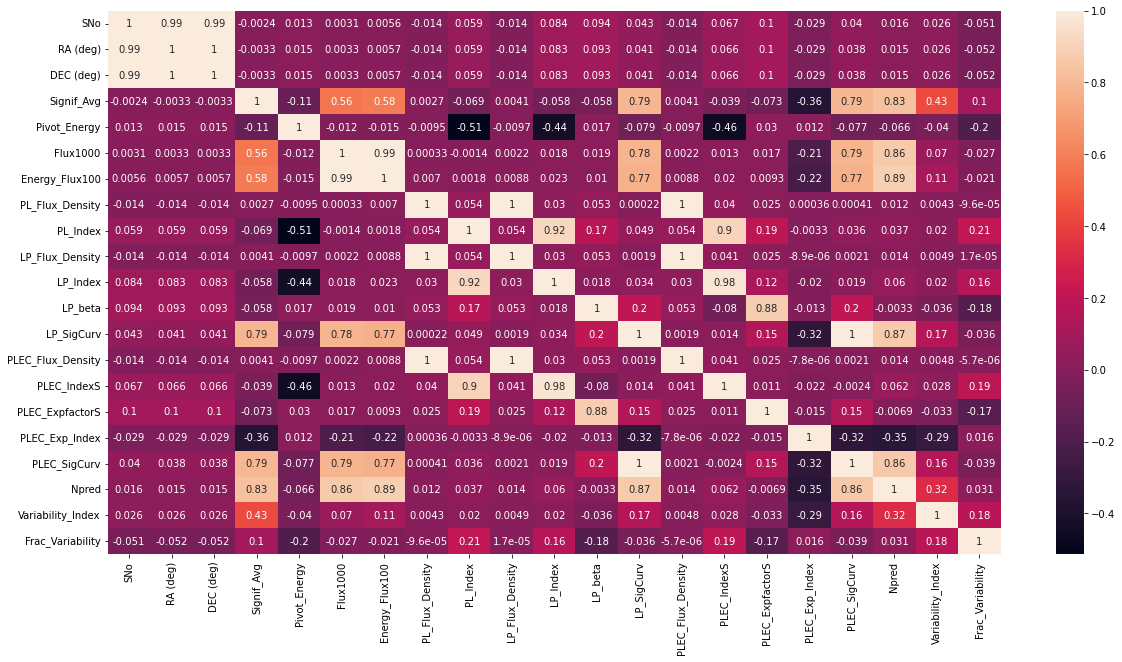

In [21]:

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(GS.corr(),annot = True)
plt.show()



---

## 6. Model building

In [22]:

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [23]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [24]:
# Getting the predicted values on the train set
y_train_pred = model.predict(X_train)
y_train_pred[:10]

array(['unk', 'fsrq', 'bcu', 'bcu', 'snr', 'fsrq', 'bcu', 'fsrq', 'bll',
       'bcu'], dtype=object)



---

## 7. Assessing the model

In [25]:
y_train_prob = model.predict_proba(X_train)
y_train_prob[:5]

array([[1.28874980e-01, 2.96328966e-01, 5.39265652e-03, 5.63044583e-03,
        4.92191145e-04, 7.82104478e-04, 7.73642720e-02, 2.83602375e-04,
        2.74900114e-04, 8.68941010e-03, 3.67101792e-03, 2.95403816e-03,
        1.04465930e-02, 1.60600478e-03, 1.30286260e-04, 4.89158428e-02,
        1.48506716e-03, 3.13203004e-03, 3.38448474e-03, 4.14461288e-03,
        2.92020369e-03, 8.26277527e-03, 7.09645059e-02, 1.00021011e-03,
        3.12868799e-01],
       [2.15869251e-03, 7.71984240e-02, 4.58434602e-04, 1.59826057e-01,
        7.18473362e-04, 1.61815481e-03, 7.30772118e-01, 1.25964551e-04,
        3.80700478e-05, 2.53611093e-04, 1.78914004e-03, 1.79163607e-03,
        2.63643991e-04, 2.31587627e-03, 1.20825297e-04, 2.88481606e-04,
        6.05931293e-04, 1.40385336e-02, 1.93322660e-03, 4.66218911e-04,
        2.59215940e-04, 7.38255765e-04, 9.55896299e-04, 5.01408640e-04,
        7.63709890e-04],
       [6.56013416e-02, 3.72556006e-01, 2.49119120e-03, 3.43304429e-01,
        6.3702

In [26]:
# True and predicted values
matrix_df = pd.DataFrame({'True':y_train.values, 'Predicted':y_train_pred})
matrix_df['SNo'] = y_train.index
matrix_df

,True,Predicted,SNo
0,unk,unk,1928
1,fsrq,fsrq,1128
2,fsrq,bcu,421
3,bll,bcu,3833
4,sfr,snr,2463
...,...,...,...
4324,bcu,bcu,5786
4325,unk,unk,2379
4326,bcu,bcu,437
4327,bll,bll,102


In [27]:
#Confusion matrix
confusion = metrics.confusion_matrix(matrix_df['True'], matrix_df['Predicted'])
print(confusion)

[[  1 104   0  17   0   0  22   0   0   0   0   0   1   0   0   2   0   0
    0   0   0   0   0   0  16]
 [  4 824   0 319   0   0 141   0   0   0   0   0  10   0   0   7   0   0
    0   0   0   0   2   0  29]
 [  0   3   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0
    0   0   0   0   1   0   1]
 [  0 304   0 978   0   0  33   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   2]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0 212   0  53   0   0 443   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   3]
 [  0   3   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0]
 [  0  21   0   0   0   0   1   0   0   0   0   0   8  

In [28]:
#printing the classification report
print(metrics.classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         agn       0.17      0.01      0.01       163
         bcu       0.47      0.62      0.53      1336
         bin       0.00      0.00      0.00         8
         bll       0.69      0.74      0.72      1319
       clust       0.00      0.00      0.00         1
         css       0.00      0.00      0.00         5
        fsrq       0.67      0.62      0.65       712
         gal       1.00      0.17      0.29         6
          gc       0.00      0.00      0.00         1
         glc       0.00      0.00      0.00        34
         hmb       1.00      0.10      0.18        10
         lmb       0.00      0.00      0.00         8
         msp       0.68      0.68      0.68       148
       nlsy1       0.00      0.00      0.00         7
         nov       0.00      0.00      0.00         4
         psr       0.70      0.63      0.66       134
         pwn       0.80      0.42      0.55        19
         rdg       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train, y_train_pred))

0.5825825825825826


*As you can see our model has an accuracy of 58%*


---

## 8. Making predictions on the test set

In [30]:

X_test.head()

,RA (deg),DEC (deg),Signif_Avg,Pivot_Energy,Flux1000,Energy_Flux100,PL_Flux_Density,PL_Index,LP_Flux_Density,LP_Index,LP_beta,LP_SigCurv,PLEC_Flux_Density,PLEC_IndexS,PLEC_ExpfactorS,PLEC_Exp_Index,PLEC_SigCurv,Npred,Variability_Index,Frac_Variability
0,-1.710862,-1.710862,-0.409208,0.319550,-0.242647,-0.283676,-0.285043,-0.746813,-0.282818,-0.631044,-0.027647,-0.313467,-0.285382,-0.625180,-0.336277,0.073835,-0.386274,-0.352231,-0.160966,-0.186350
1,1.046791,1.046791,-0.351492,-0.483898,-0.195925,-0.197928,-0.214998,1.246638,-0.200268,1.772410,0.838241,0.191379,-0.200123,1.526625,0.774721,0.073835,0.055805,-0.177968,-0.080191,1.635442
2,-0.271401,-0.271401,-0.061306,-0.009471,-0.189197,-0.205878,-0.274663,-0.406430,-0.275430,-0.049432,-1.006547,-0.344988,-0.276715,0.033265,-0.647847,0.073835,-0.678316,-0.201769,-0.144487,-0.026748
3,1.156032,1.156032,5.446181,-0.276063,1.697262,2.591379,0.258083,-1.504647,0.182631,-1.111385,-0.684526,0.208078,0.188071,-0.959591,-0.616565,0.073835,0.173668,2.829953,1.615038,0.343816
4,0.558330,0.558330,-0.313056,0.106106,-0.195516,-0.215643,-0.278356,-0.493885,-0.277232,-0.296797,-0.580691,-0.481729,-0.279408,-0.245763,-0.511403,0.073835,-0.441831,-0.281045,-0.153554,0.095068


In [31]:
y_test_pred = model.predict(X_test)
y_test_pred[:10]

array(['bcu', 'bcu', 'bll', 'bll', 'bll', 'bll', 'bll', 'msp', 'psr',
       'bcu'], dtype=object)

In [32]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,bcu
1,bcu
2,bll
3,bll
4,bll


In [33]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,CLASS
265,bcu
5523,bcu
2506,bcu
5722,bll
4052,bcu


In [34]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,CLASS,0
0,bcu,bcu
1,bcu,bcu
2,bcu,bll
3,bll,bll
4,bcu,bll


In [35]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Predicted','CLASS':'True'})
y_pred_final

,True,Predicted
0,bcu,bcu
1,bcu,bcu
2,bcu,bll
3,bll,bll
4,bcu,bll
...,...,...
476,bll,bll
477,unk,bcu
478,bcu,bcu
479,bcu,bcu


In [36]:
#checking the overall accuracy
metrics.accuracy_score(y_test_df,y_pred_1)

0.5758835758835759

In [37]:
# confusioin matatrix
metrics.confusion_matrix(y_test_df,y_pred_1)

array([[ 0, 14,  0,  2,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1],
       [ 0, 97,  0, 39, 16,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0, 32,  0, 96,  5,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
         0,  2],
       [ 1, 20,  0,  2, 55,  0,  0,  1,  0,  2,  1,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  9,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,
         0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  2,  0,  

In [38]:
#printing the classification report
print(metrics.classification_report(y_test_df,y_pred_1))

              precision    recall  f1-score   support

         agn       0.00      0.00      0.00        20
         bcu       0.52      0.62      0.56       157
         bin       0.00      0.00      0.00         2
         bll       0.66      0.70      0.68       137
        fsrq       0.67      0.67      0.67        82
         glc       0.00      0.00      0.00         3
         hmb       0.00      0.00      0.00         1
         msp       0.56      0.69      0.62        13
       nlsy1       0.00      0.00      0.00         1
         psr       0.50      0.79      0.61        14
         pwn       0.00      0.00      0.00         0
         rdg       0.00      0.00      0.00         5
         sbg       0.00      0.00      0.00         2
         sey       0.00      0.00      0.00         1
         sfr       0.00      0.00      0.00         1
         snr       0.60      0.50      0.55         6
         spp       0.00      0.00      0.00        15
         unk       0.33    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [39]:
def eval():
    print("Accuracy :" + str(metrics.accuracy_score(y_test_df,y_pred_1)))
    print('True and predicted value comparison')
    print(y_pred_final)
    print('Confusion matrix')
    print(metrics.confusion_matrix(y_test_df,y_pred_1))
    print('Classification Report')
    print(metrics.classification_report(y_test_df,y_pred_1))
eval()

Accuracy :0.5758835758835759
True and predicted value comparison
    True Predicted
0    bcu       bcu
1    bcu       bcu
2    bcu       bll
3    bll       bll
4    bcu       bll
..   ...       ...
476  bll       bll
477  unk       bcu
478  bcu       bcu
479  bcu       bcu
480  snr       snr

[481 rows x 2 columns]
Confusion matrix
[[ 0 14  0  2  3  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0 97  0 39 16  0  0  4  0  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 32  0 96  5  0  0  0  0  0  1  0  0  0  0  1  0  2]
 [ 1 20  0  2 55  0  0  1  0  2  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  9  0  1  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  2  1  0  0  0  0  0  0  0  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

Our model gives us an accuracy of around 58 % on test data as well.
It may not be extremely accurate but the consistent performance across the training and test data means our model is not overfitted.